# Data Assimilation - case IV from the notes
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/course_objective_analysis/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/course_objective_analysis/blob/main/code/data_assimilation_case4.ipynb)

Following Case IV from the notes, let’s consider the case where Station 1 is placed at a position of x = −2.0 km away from the analysis site, which is located at x = 0. Where should we place Station 2 for the lowest analysis error variance at our analysis site?

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.stats as stats

### Setup/Assumptions

First, we will setup our grid. 

In [15]:
x = np.arange(-6.,6,.1)

First, assume that $\alpha$, which is the ratio of our observational error variance to our background error variance is the same for all stations and is 0.25.

In [16]:
alpha = 0.25

We know that Station 1 is fixed at x = -2.0 km. So let's code that up.

In [17]:
station1_x = -2.0

Finally, we still need some information about how the correlation between our stations varies as a function of position. For now, let's say that the correlation between any two points is only a function of their distance apart (namely, a decaying exponential). (This will show-up in our code).

$\rho(\Delta x) = (1+|\Delta x|)e^{-|\Delta x|}$

Since Station 1 is located at x = -2.0, note this means that $\rho_{10} = .406$ (just plugging $\Delta x = 2.0$ into the above equation).

### Results

Now we are ready. Let's step through all possible positions of Station 2 (step through all of our x-values) and calculate the error variance at our analysis point. We will also keep track of $w_1$ and $w_2$, namely, the optimal weights of the observations at Station 1 and Station 2 for determining the value at our analysis point (x = 0).

In [18]:
w1 = np.empty(np.size(x))
w2 = np.empty(np.size(x))
e = np.empty(np.size(x))

for ix,xval in enumerate(x):
    
    rho_12 = (1.+np.abs(xval-station1_x))*np.exp(-np.abs(xval-station1_x))
    rho_20 = (1.+np.abs(xval-0.))*np.exp(-np.abs(xval-0.))
    rho_10 = (1.+np.abs(station1_x-0.))*np.exp(-np.abs(station1_x-0.))

    # playing with different cases
    #rho_12 = .5
    #rho_20 = .4
    #rho_10 = .3
    
    w1[ix] = (rho_10*(1.+alpha) - rho_12*rho_20)/((1.+alpha)**2 - rho_12**2)
    w2[ix] = (rho_20*(1.+alpha) - rho_12*rho_10)/((1.+alpha)**2 - rho_12**2)

    e[ix] = 1. - ( (1.+alpha)*(rho_10**2 + rho_20**2) - 2.*rho_10*rho_20*rho_12 )/ ( (1.+alpha)**2 - rho_12**2 )

Okay - calculation done. Now let's plot the results to see what it looks like!

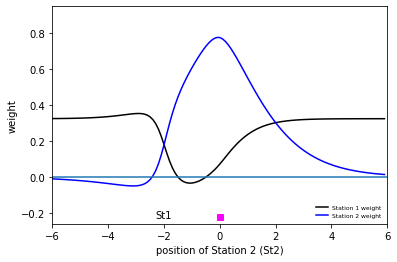

In [19]:
plt.figure()
plt.plot(x,w1,'-',color = 'black', label = 'Station 1 weight', linewidth = 1.5)
plt.plot(x,w2,'-', color = 'blue', label = 'Station 2 weight', linewidth = 1.5)
plt.text(station1_x, -.23,'St1', horizontalalignment = 'center', color = 'black')
plt.plot(0, -.22,'s', color = 'fuchsia')

plt.ylabel('weight')
plt.xlabel('position of Station 2 (St2)')
plt.ylim(-.26,0.95)
plt.xlim(-6,6)
plt.axhline(y=0)
plt.legend(frameon = False, loc = 4, fontsize = 6)
plt.show()

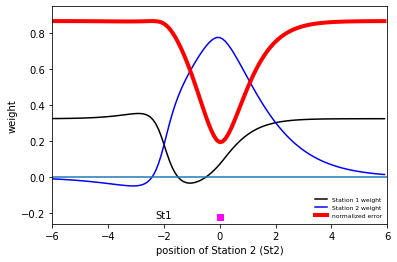

In [20]:
plt.figure()
plt.plot(x,w1,'-',color = 'black', label = 'Station 1 weight', linewidth = 1.5)
plt.plot(x,w2,'-', color = 'blue', label = 'Station 2 weight', linewidth = 1.5)
plt.text(station1_x, -.23,'St1', horizontalalignment = 'center', color = 'black')
plt.plot(0, -.22,'s', color = 'fuchsia')

plt.plot(x,e,'-', color = 'red', label = 'normalized error', linewidth = 4)

plt.ylabel('weight')
plt.xlabel('position of Station 2 (St2)')
plt.ylim(-.26,0.95)
plt.xlim(-6,6)
plt.axhline(y=0)
plt.legend(frameon = False, loc = 4, fontsize = 6)
plt.show()


Following some [notes from the U. of Toronto](http://www.atmosp.physics.utoronto.ca/PHY2509/ch3.pdf), we can make the following conclusions:

* When Station 2 is to the left of Station 1, the weight given to it is very small. The weight given to Station 1 is close to what one would obtain with only one observation.

* When Station 2 is coincident with Station 1, the weights given to both observations are the same. 

* As Station 2 moves closer to the analysis location, its weight increases while the weight given to Station 1 decreases. Overall though, the analysis error begins to decrease until Station 2 coincides with the analysis location. At this point, the weight for Station 2 is maximized. 

* As Station 2 moves further to the right away from the analysis point, its weight begins to decrease and the total analysis error increases. 

* When Station 2 is at x=2, the same distance from the analysis gridpoint as Station 1, the weights are again equal but larger than when the observations were collocated. 

* Finally as Station 2 moves further to the right, its weight drops off and its impact on the analysis becomes diminished. 

* The weight for Station 1 can be negative when Station 2 is closer to the analysis point. Similarly, the weight for Station 2 can be negative when Station 1 is closer to the analysis location. This is the effect of observation screening, when the weight given to a more distant observation can actually be negative due to the presence of a closer observation.